# Housing Prices

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('house-prices.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [4]:
# columns that contain null values
a = df.isnull().sum()
a[a != 0]

Lot Frontage       420
Alley             2267
Mas Vnr Type        20
Mas Vnr Area        20
Bsmt Qual           71
Bsmt Cond           71
Bsmt Exposure       74
BsmtFin Type 1      71
BsmtFin SF 1         1
BsmtFin Type 2      72
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1186
Garage Type        136
Garage Yr Blt      138
Garage Finish      138
Garage Cars          1
Garage Area          1
Garage Qual        138
Garage Cond        138
Pool QC           2418
Fence             1941
Misc Feature      2340
dtype: int64

In [5]:
# drop two identifiers column from data set, given they are not useful in predicting sale prices
df.drop(['Order','PID'], axis=1,inplace=True)
# Clean and replace missing values and null values
df.drop(['Pool QC','Fence','Misc Feature'],axis=1,inplace=True)
# Deal with 'Lot Frontage'
df['Lot Frontage'].fillna(value=0,inplace=True)
# NA value is associated with no alley, I fill NA with "No"
df['Alley'].fillna(value='No',inplace=True)
# Masonry veneer type and area surface have 20 true missing values, I fill them with forward fill method
df['Mas Vnr Type'].fillna(method='ffill',inplace=True)
df['Mas Vnr Area'].fillna(method='ffill',inplace=True)
# No basement NA value is being replaced with "No"
df['Bsmt Qual'].fillna(value='No',inplace=True)
df['Bsmt Cond'].fillna(value='No',inplace=True)
df['Bsmt Exposure'].fillna(value='NA',inplace=True)
df['BsmtFin Type 1'].fillna(value='No',inplace=True)
df['BsmtFin Type 2'].fillna(value='No',inplace=True)
df['Bsmt Full Bath'].fillna(df['Bsmt Full Bath'].median(),inplace=True)
df['Bsmt Half Bath'].fillna(df['Bsmt Half Bath'].median(),inplace=True)
# fill the rest of basement related value with mean values of the columns.
df['BsmtFin SF 1'].fillna(value=df['BsmtFin SF 1'].mean(),inplace=True)
df['BsmtFin SF 2'].fillna(value= 0,inplace=True)
df['Bsmt Unf SF'].fillna(value=df['Bsmt Unf SF'].mean(),inplace=True)
df['Total Bsmt SF'].fillna(value=df['Total Bsmt SF'].mean(),inplace=True)
# No fireplace NA values are being replaced with "No"
df['Fireplace Qu'].fillna(value='No',inplace=True)
# Garage missing values
df['Garage Type'].fillna(value='No',inplace=True)
df['Garage Finish'].fillna(value='No',inplace=True)
df['Garage Qual'].fillna(value='No',inplace=True)
df['Garage Cond'].fillna(value='No',inplace=True)
df['Garage Cars'].fillna(method='ffill',inplace=True)
df['Garage Area'].fillna(value=df['Garage Area'].mean(),inplace=True)
# Electrical 
df['Electrical'].fillna(method='ffill',inplace=True)

Encode the year value

In [6]:
df['Garage Modernity'] = pd.qcut(df['Garage Yr Blt'], q=5).cat.codes
df['Year Built Rating'] = pd.qcut(df['Year Built'],q=5).cat.codes
df['Year Remod/Add Rating'] = pd.qcut(df['Year Remod/Add'],q=5).cat.codes
df['Lot Modernity'] = np.maximum(df['Year Built Rating'],df['Year Remod/Add Rating'])

In [7]:
# Detecting whether there is duplicated rows 
df[df.duplicated()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Garage Modernity,Year Built Rating,Year Remod/Add Rating,Lot Modernity


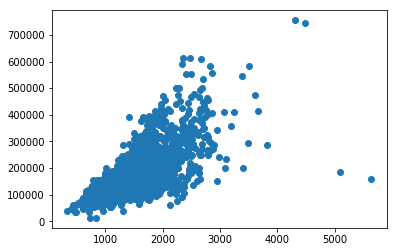

In [8]:
# Detecting outliers
x = df['Gr Liv Area'].values
y = df['SalePrice'].values
plt.scatter(x,y)

In [9]:
# Eliminate outliers from data sample
idx = x > 5000
df = df[~idx]

In [10]:
# Add log prices to dataframe
df['LogSalePrice'] = np.log10(df['SalePrice'])

# Simple Model (two variables)

two vairables: total surface (Gr Liv area + Total Bsmt SF), Sale Condition

In [11]:
df['Total Surface'] = df.loc[:,'Gr Liv Area'] + df.loc[:,'Total Bsmt SF']
df_s = df.loc[:,['Sale Condition','LogSalePrice','Total Surface']]
df_s.head()

,Sale Condition,LogSalePrice,Total Surface
0,Normal,5.372912,3208.0
1,Normal,5.190332,1791.0
2,Normal,4.875061,1638.0
3,Normal,5.218798,3098.0
4,Normal,5.086360,2814.0


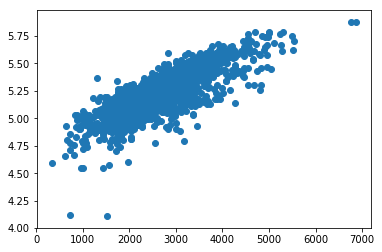

In [12]:
# Detecting outliers
x = df_s['Total Surface'].values
y = df_s.LogSalePrice.values
plt.scatter(x,y)

There seem to be 4 points that are out of swarm distinctively. But I think there is no sufficient argument to eliminate them. small surface house has a very low sale price can be due to many things. very big surface house aren't that expensive can due to the condition of the neighbourhood, the quality, etc.

In [13]:
# Encoding sale condition
pd.get_dummies(df_s,columns=['Sale Condition']).head()

,LogSalePrice,Total Surface,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,5.372912,3208.0,0,0,0,0,1,0
1,5.190332,1791.0,0,0,0,0,1,0
2,4.875061,1638.0,0,0,0,0,1,0
3,5.218798,3098.0,0,0,0,0,1,0
4,5.086360,2814.0,0,0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
encoded_dfs = pd.get_dummies(df_s,columns=['Sale Condition'])
X = encoded_dfs.drop(['LogSalePrice'],axis=1).values
y = encoded_dfs.LogSalePrice.values
# splitting data 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_te)
def RMSLE(y_te,y_pred):
    return np.sqrt(np.mean(np.square(y_te - y_pred)))
RMSLE_S = RMSLE(y_te,y_pred)
print('RMSLE for simple model:', RMSLE_S)

RMSLE for simple model: 0.09921493258752494


In [18]:
def MAE(y_te,y_pred):
    return np.mean(np.abs(10**y_te - 10**y_pred))
MAE_S = MAE(y_te,y_pred)
print('MAE for simple model in dollars:', MAE_S)

MAE for simple model in dollars: 28747.86598731449


In [19]:
# Since data may have outliers, I try Huber regression too
from sklearn.linear_model import HuberRegressor
lr_huber = HuberRegressor(epsilon=1.4)
lr_huber.fit(X_tr,y_tr)
y_pred = lr_huber.predict(X_te)
RMSLE_S = RMSLE(y_te,y_pred)
print('RMSLE for simple model using Huber Loss method:', RMSLE_S)
MAE_S = MAE(y_te,y_pred)
print('MAE for simple model using Huber Loss method:', MAE_S)

RMSLE for simple model using Huber Loss method: 0.14650512728631024
MAE for simple model using Huber Loss method: 30691.071578326788


Linear regression model using OLS fits better

# Intermediate Model

16 Independent variables I chose to fit intermediate models: MS SubClass, MS Zoning, Utilities, Lot Config, Overall Qual, Overall Cond, Lot Modernity (combines 'Year Built' and 'Year Remond/Add' variables), Exter Qual, Exter Cond, Total Rooms (total numbers of rooms: Full Bath + Half Bath + TotRms AbvGrd), Bsmt Qual, Bsmt Cond, Garage Qual, Garage Cond, Total Surface, Sale Condition.

In [20]:
# Lot Morderntiy is engineered before 
# Product variable 'Total Rooms'
df['Total Rooms'] = df.loc[:,'Full Bath'] + df.loc[:,'Half Bath'] + df.loc[:,'TotRms AbvGrd']
df_int = df.loc[:,['MS SubClass','MS Zoning','Utilities','Lot Config','Overall Qual','Overall Cond','Lot Modernity',
                   'Exter Qual','Exter Cond','Total Rooms','Bsmt Qual','Bsmt Cond','Garage Qual','Garage Cond','Total Surface',
                   'Sale Condition','LogSalePrice']]
df_int.head()

,MS SubClass,MS Zoning,Utilities,Lot Config,Overall Qual,Overall Cond,Lot Modernity,Exter Qual,Exter Cond,Total Rooms,Bsmt Qual,Bsmt Cond,Garage Qual,Garage Cond,Total Surface,Sale Condition,LogSalePrice
0,60,RL,AllPub,Inside,7,5,3,Gd,TA,11,Gd,TA,TA,TA,3208.0,Normal,5.372912
1,20,RL,AllPub,Corner,6,6,1,TA,TA,7,TA,TA,TA,TA,1791.0,Normal,5.190332
2,160,RM,AllPub,Inside,4,5,2,TA,TA,8,TA,TA,TA,TA,1638.0,Normal,4.875061
3,20,RL,AllPub,Inside,5,5,1,TA,TA,8,TA,TA,TA,TA,3098.0,Normal,5.218798
4,190,RM,AllPub,Inside,7,4,0,Fa,TA,11,TA,TA,TA,TA,2814.0,Normal,5.086360


In [21]:
df_int.shape

(2428, 17)

In [22]:
# Encode Nominal variables
df_int_en = pd.get_dummies(df_int,columns=['Sale Condition','MS SubClass','MS Zoning','Utilities','Lot Config'])
# Encode Ordinal Variables
df_int_en['Exter Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_int_en['Exter Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_int_en['Bsmt Qual'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_int_en['Bsmt Cond'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_int_en['Garage Qual'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_int_en['Garage Cond'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_int_en.head()

,Overall Qual,Overall Cond,Lot Modernity,Exter Qual,Exter Cond,Total Rooms,Bsmt Qual,Bsmt Cond,Garage Qual,Garage Cond,...,MS Zoning_RL,MS Zoning_RM,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,7,5,3,4,3,11,4,3,3,3,...,1,0,1,0,0,0,0,0,0,1
1,6,6,1,3,3,7,3,3,3,3,...,1,0,1,0,0,1,0,0,0,0
2,4,5,2,3,3,8,3,3,3,3,...,0,1,1,0,0,0,0,0,0,1
3,5,5,1,3,3,8,3,3,3,3,...,1,0,1,0,0,0,0,0,0,1
4,7,4,0,2,3,11,3,3,3,3,...,0,1,1,0,0,0,0,0,0,1


In [23]:
X = df_int_en.drop(['LogSalePrice'],axis=1).values
y = df_int_en.LogSalePrice.values
# splitting data 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

In [24]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_te)
RMSLE_int = RMSLE(y_te,y_pred)
print('RMSLE for intermediate model:', RMSLE_int)
MAE_int = MAE(y_te,y_pred)
print('MAE for intermediate model in dollars:', MAE_int)

RMSLE for intermediate model: 0.06344436637315971
MAE for intermediate model in dollars: 17239.213693660684


In [27]:
# Define a set of alpha values
alphas = np.logspace(-30, -10, num=100)
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
train_scores = []
test_scores = []
for alpha in alphas:
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)

    # Performance on train set
    y_pred = ridge.predict(X_tr)
    train_mse = mse(y_tr, y_pred)
    train_scores.append(train_mse)

    # Performance on test set
    y_pred = ridge.predict(X_te)
    test_mse = mse(y_te, y_pred)
    test_scores.append(test_mse)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3238817243509967e-22 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.247046058976461e-22 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.951611609421776e-22 / 1.1102230246251565e-16
  RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

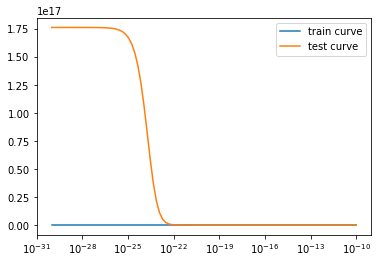

In [28]:
# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [29]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_score = test_scores[idx]

print('Best alpha value {:.1e} with score {:.2f}'.format(
    best_alpha, best_score))

Best alpha value 1.0e-10 with score 0.00


The regularization strength is very low, which means the original model is not overfitting. 

In [36]:
ridge = Ridge(alpha=10**-10)
ridge.fit(X_tr,y_tr)
y_pred = ridge.predict(X_te)
MAE_int_ridge = MAE(y_te,y_pred)
print('MAE after regularization:',MAE_int_ridge)

MAE after regularization: 17239.317347190685


/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3411233232937105e-19 / 1.1102230246251565e-16
  RuntimeWarning)


MAE is almost the same without regularization

# Complex Model

In [37]:
# Drop the variables that have been used to combine into another variable
df.drop(['Year Built','Year Remod/Add','Full Bath','Half Bath','TotRms AbvGrd','SalePrice','Garage Yr Blt','Gr Liv Area','Total Bsmt SF'],axis=1,inplace=True)
# Drop the variables that are either irrelavant or its pair variable has too many missing values I have to drop this feature
df.drop(['Misc Val','Mo Sold','Yr Sold','Year Built Rating','Year Remod/Add Rating'],axis=1,inplace=True)

I work with 69 independent variables in complex model. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2428 entries, 0 to 2429
Data columns (total 70 columns):
MS SubClass         2428 non-null int64
MS Zoning           2428 non-null object
Lot Frontage        2428 non-null float64
Lot Area            2428 non-null int64
Street              2428 non-null object
Alley               2428 non-null object
Lot Shape           2428 non-null object
Land Contour        2428 non-null object
Utilities           2428 non-null object
Lot Config          2428 non-null object
Land Slope          2428 non-null object
Neighborhood        2428 non-null object
Condition 1         2428 non-null object
Condition 2         2428 non-null object
Bldg Type           2428 non-null object
House Style         2428 non-null object
Overall Qual        2428 non-null int64
Overall Cond        2428 non-null int64
Roof Style          2428 non-null object
Roof Matl           2428 non-null object
Exterior 1st        2428 non-null object
Exterior 2nd        2428 non-null o

In [40]:
# Encoding the nominal variables
df_complex = pd.get_dummies(df,columns=['Sale Condition','MS SubClass','MS Zoning','Lot Config',
                                       'Street','Alley','Land Contour','Neighborhood','Condition 1','Condition 2',
                                       'Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd',
                                       'Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Sale Type'])
# Encoding the Ordinal Variables
df_complex['Lot Shape'].replace({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},inplace=True)
df_complex['Utilities'].replace({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},inplace=True)
df_complex['Land Slope'].replace({'Sev': 1, 'Mod': 2, 'Gtl': 3},inplace=True)
df_complex['Exter Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Exter Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Bsmt Qual'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Bsmt Cond'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Bsmt Exposure'].replace({'NA':0 ,'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},inplace=True)
df_complex['BsmtFin Type 1'].replace({'No':0 ,'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5,'GLQ':6},inplace=True)
df_complex['BsmtFin Type 2'].replace({'No':0 ,'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5,'GLQ':6},inplace=True)
df_complex['Electrical'].replace({'Mix':0,'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4},inplace=True)
df_complex['Heating QC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Functional'].replace({'Sal':0 ,'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5,'Min1':6,'Typ':7},inplace=True)
df_complex['Fireplace Qu'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Garage Finish'].replace({'No': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},inplace=True)
df_complex['Garage Qual'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Garage Cond'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_complex['Paved Drive'].replace({'N':0,'P':1,'Y':2},inplace=True)

In [41]:
df_complex.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,0.0,8795,3,4,3,7,5,0.0,4,3,...,0,0,0,0,0,0,0,0,0,1
1,75.0,10170,4,4,3,6,6,522.0,3,3,...,0,0,0,0,0,0,0,0,0,1
2,21.0,2001,4,4,3,4,5,80.0,3,3,...,0,0,0,0,0,0,0,0,0,1
3,70.0,10552,3,4,3,5,5,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1
4,60.0,10120,3,4,3,7,4,0.0,2,3,...,0,0,0,0,0,0,0,0,0,1


In [42]:
X = df_complex.drop(['LogSalePrice'],axis=1).values
y = df_complex.LogSalePrice.values
# splitting data 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0)

In [43]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)
y_pred = lr.predict(X_te)
RMSLE_complex = RMSLE(y_te,y_pred)
print('RMSLE for complex model:', RMSLE_complex)
MAE_complex = MAE(y_te,y_pred)
print('MAE for complex model in dollars:', MAE_complex)

RMSLE for complex model: 0.058136856285078135
MAE for complex model in dollars: 13549.070931536933


# Model Comparison

In [44]:
# Baseline Model
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='median')
dummy.fit(X_tr,y_tr)
y_pred = dummy.predict(X_te)
MAE_base = MAE(y_te,y_pred)

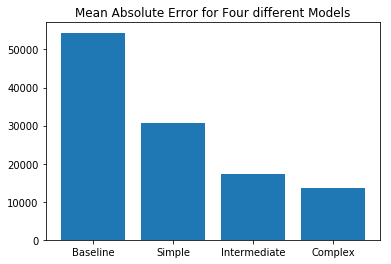

In [45]:
# Plot MAE value for different models
plt.bar([1,2,3,4],[MAE_base,MAE_S,MAE_int,MAE_complex])
plt.xticks([1,2,3,4],['Baseline','Simple','Intermediate','Complex'])
plt.title('Mean Absolute Error for Four different Models')
plt.show()

# Prediction

In [46]:
df_te = pd.read_csv('house-prices-test.csv')
df_p = df_te.drop(['Order','PID'],axis=1)

In [47]:
b = df_p.isnull().sum()
b[b != 0]

Lot Frontage       70
Alley             465
Mas Vnr Type        3
Mas Vnr Area        3
Bsmt Qual           9
Bsmt Cond           9
Bsmt Exposure       9
BsmtFin Type 1      9
BsmtFin Type 2      9
Fireplace Qu      236
Garage Type        21
Garage Yr Blt      21
Garage Finish      21
Garage Qual        21
Garage Cond        21
Pool QC           499
Fence             417
Misc Feature      484
dtype: int64

Deal with missing value

In [48]:
# Deal with 'Lot Frontage'
df_p['Lot Frontage'].fillna(value=0,inplace=True)
# NA value is associated with no alley, I fill NA with "No"
df_p['Alley'].fillna(value='No',inplace=True)
# Masonry veneer type and area surface have 20 true missing values, I fill them with forward fill method
df_p['Mas Vnr Type'].fillna(method='ffill',inplace=True)
df_p['Mas Vnr Area'].fillna(method='ffill',inplace=True)
# No basement NA value is being replaced with "No"
df_p['Bsmt Qual'].fillna(value='No',inplace=True)
df_p['Bsmt Cond'].fillna(value='No',inplace=True)
df_p['Bsmt Exposure'].fillna(value='No',inplace=True)
df_p['BsmtFin Type 1'].fillna(value='No',inplace=True)
df_p['BsmtFin Type 2'].fillna(value='No',inplace=True)
# No fireplace NA values are being replaced with "No"
df_p['Fireplace Qu'].fillna(value='No',inplace=True)
# Garage missing values
df_p['Garage Type'].fillna(value='No',inplace=True)
df_p['Garage Finish'].fillna(value='No',inplace=True)
df_p['Garage Qual'].fillna(value='No',inplace=True)
df_p['Garage Cond'].fillna(value='No',inplace=True)

Encode the year value

In [49]:
df_p['Garage Modernity'] = pd.qcut(df_p['Garage Yr Blt'], q=5).cat.codes
df_p['Year Built Rating'] = pd.qcut(df_p['Year Built'],q=5).cat.codes
df_p['Year Remod/Add Rating'] = pd.qcut(df_p['Year Remod/Add'],q=5).cat.codes
df_p['Lot Modernity'] = np.maximum(df_p['Year Built Rating'],df_p['Year Remod/Add Rating'])

Create Variables

In [50]:
df_p['Total Rooms'] = df_p.loc[:,'Full Bath'] + df_p.loc[:,'Half Bath'] + df_p.loc[:,'TotRms AbvGrd']
df_p['Total Surface'] = df_p.loc[:,'Gr Liv Area'] + df_p.loc[:,'Total Bsmt SF']

In [51]:
# Detecting whether there is duplicated rows 
df_p[df_p.duplicated()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,Garage Modernity,Year Built Rating,Year Remod/Add Rating,Lot Modernity,Total Rooms,Total Surface


In [52]:
# Drop the variables that have been used to combine into another variable
df_p.drop(['Year Built','Year Remod/Add','Full Bath','Half Bath','TotRms AbvGrd','Garage Yr Blt','Gr Liv Area','Total Bsmt SF'],axis=1,inplace=True)
# Drop the variables that are either irrelavant or its pair variable has too many missing values I have to drop this feature
df_p.drop(['Misc Val','Mo Sold','Yr Sold','Year Built Rating','Year Remod/Add Rating','Pool QC','Fence','Misc Feature'],axis=1,inplace=True)

In [53]:
df_p.shape

(500, 69)

The test data now have the same number of independent variables as the train data right now.

In [54]:
# Encoding the nominal variables
df_p = pd.get_dummies(df_p,columns=['Sale Condition','MS SubClass','MS Zoning','Lot Config',
                                       'Street','Alley','Land Contour','Neighborhood','Condition 1','Condition 2',
                                       'Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd',
                                       'Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Sale Type'])
# Encoding the Ordinal Variables
df_p['Lot Shape'].replace({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},inplace=True)
df_p['Utilities'].replace({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},inplace=True)
df_p['Land Slope'].replace({'Sev': 1, 'Mod': 2, 'Gtl': 3},inplace=True)
df_p['Exter Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Exter Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Bsmt Qual'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Bsmt Cond'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Bsmt Exposure'].replace({'NA':0 ,'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},inplace=True)
df_p['BsmtFin Type 1'].replace({'No':0 ,'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5,'GLQ':6},inplace=True)
df_p['BsmtFin Type 2'].replace({'No':0 ,'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5,'GLQ':6},inplace=True)
df_p['Electrical'].replace({'Mix':0,'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4},inplace=True)
df_p['Heating QC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Functional'].replace({'Sal':0 ,'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5,'Min1':6,'Typ':7},inplace=True)
df_p['Fireplace Qu'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Garage Finish'].replace({'No': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},inplace=True)
df_p['Garage Qual'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Garage Cond'].replace({'No':0 ,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)
df_p['Paved Drive'].replace({'N':0,'P':1,'Y':2},inplace=True)

In [55]:
df_p.shape

(500, 202)

Encoded test set data doesn't have the same column indexes as the train set do, the number of column in train set is 228

In [57]:
df_complex1 = df_complex.drop(['LogSalePrice'],axis=1)
df_p_reindexed = df_p.reindex(columns=df_complex1.columns)

In [58]:
c = df_p_reindexed.isnull().sum()
c[c != 0]

MS SubClass_150         500
MS Zoning_A (agr)       500
MS Zoning_I (all)       500
Neighborhood_Greens     500
Neighborhood_GrnHill    500
Neighborhood_Landmrk    500
Condition 2_Artery      500
Condition 2_PosA        500
Condition 2_RRAe        500
Condition 2_RRAn        500
Condition 2_RRNn        500
Roof Style_Shed         500
Roof Matl_Membran       500
Roof Matl_Metal         500
Roof Matl_WdShngl       500
Exterior 1st_AsphShn    500
Exterior 1st_BrkComm    500
Exterior 1st_CBlock     500
Exterior 1st_ImStucc    500
Exterior 1st_PreCast    500
Exterior 1st_Stone      500
Exterior 2nd_AsphShn    500
Exterior 2nd_PreCast    500
Mas Vnr Type_CBlock     500
Foundation_Wood         500
Heating_Floor           500
Sale Type_Con           500
Sale Type_VWD           500
dtype: int64

Above encoded dummies belong to the train set, not test set. The reindex method created null values in those columns. Since it's a feature that isn't in test set, it makes sense to fill them with 0, marking this feature non-existent in test set.

In [59]:
df_p_reindexed.fillna(value=0,inplace=True)

In [60]:
y_pred = lr.predict(df_p_reindexed)
predictions = 10**y_pred
PID = df_te.PID

In [61]:
predictions_df = pd.DataFrame({ 'PID' : PID, 'SalePrice': predictions})
predictions_df.head()

,PID,SalePrice
0,909279080,218375.219734
1,907126050,152764.127572
2,528144030,288798.775405
3,535452060,125647.894344
4,911202100,89657.918994


Verify distributions of predicted prices

In [62]:
predictions_df.SalePrice.describe()

count       500.000000
mean     184729.902917
std       89612.754945
min       37614.854625
25%      130511.784102
50%      161597.247515
75%      214959.913960
max      963749.602155
Name: SalePrice, dtype: float64

In [63]:
input_df = pd.read_csv('house-prices.csv')
input_df.SalePrice.describe()

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

In [64]:
# Save Data
predictions_df.to_csv('house-prices-pred.csv', index=False, float_format='%.0f')